#### EXERCISE: CYGNSS DATA AND ML APPLICATION
 
The CyGNSS satellite mission uses remote sensing with GPS signals to scan the ocean surface. The roughness of the ocean surface is presumed to be related to the windspeed, provided by another dataset (ERA5). CyGNSS provides two-dimensional image data along with other parameters of the observation. In the first task, you will become familiar with the data. In the second task, you should implement a machine learning application using an ANN that relates these images to the windspeed.

Please use Python to solve the tasks. We appreciate an informal presentation of your method and findings via a Jupyter notebook.
- Task 1: Extract the image data of good quality and corresponding windspeeds from the data.
- Task 2: Use a ML framework of your choice to implement an artificial neural network for analysing the image data from Task 1.

The data are in NetCDF4 format, which can be accessed with the Python library xarray. 

The data are available here: https://nextcloud.dkrz.de/s/txLazRSpWDjRTzz (250 MB)

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import OrderedDict
import random
import warnings
import time

import holoviews as hv
from holoviews import opts
import hvplot.xarray
from holoviews.operation.timeseries import rolling
#hv.extension('bokeh')
hv.extension('matplotlib')

from tensorflow import keras
from tensorflow.keras.callbacks import Callback

# ====== for plotting
plt.rcParams.update({'font.size': 18,'legend.fontsize': 14})


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

/Users/North/opt/anaconda3/envs/WORK1_TensorFlow/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/North/opt/anaconda3/envs/WORK1_TensorFlow/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/North/opt/anaconda3/envs/WORK1_TensorFlow/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Use

In [2]:
# build a dashboard to monitor the accuracy and loss during training

class MonitorCallback(Callback):
    """
    Builds a streaming dashboard to monitor the accuracy
    and loss during training using HoloViews streams.
    """
    
    #_format = '%s - Epoch: %d - Elapsed time: %.2fs'
    _format = '%s - Epoch: %d'
    
    def __init__(self, metrics=['acc', 'loss']):
        super().__init__()
        sample = {'Epoch': np.array([])}
        for metric in metrics:
            sample[metric] = np.array([])
        self.buffer = hv.streams.Buffer(sample)
        dmaps = []
        for metric in metrics:
            def cb(data, metric=metric):
                return hv.Curve(
                    data, 'Epoch', metric, label=self._format
                    % (metric, self.epoch))
            
            dmap = hv.DynamicMap(cb, streams=[self.buffer])
            dmaps.append(dmap)
        self.layout = hv.Layout(dmaps)
        self.metrics = metrics
        self.start_time = None
        self.epoch = 0

    def on_train_begin(self, logs={}):
        self.start_time = time.time()
        
    @property
    def elapsed_time(self):
        if self.start_time is None:
            return 0
        else:
            return time.time() - self.start_time

    def on_epoch_end(self, epoch, logs=None):
        self.epoch += 1
        data = {'Epoch': [self.epoch]}
        for metric in self.metrics:            
            data[metric] = [logs.get(metric)]
        self.buffer.send(data)
        
def get_sample(ds_sub,set='training'):
    #flowtype = flowtype or np.random.choice(qualities)
    if set=='training': i = int(random.choice(train_set))
    elif set=='validation': i = int(random.choice(validation_set))
    else: i = int(random.choice(test_set))
    #i = random.choice(train_set if set == 'training' else test_set)
    return ds_sub.sel(sd=i)

def gen_samples(ds_standard,set='training', labels=None):
    "Generates random arrays along with landuse labels"
    while True:
        choice = get_sample(ds_standard,set=set)
        if labels is not None:
            labels.append(choice.name)
        one_hot = one_hot_mapping[int(choice.quality.values)]
        data = choice.brcs
        #print(one_hot[np.newaxis,].shape)
        yield data.values[np.newaxis,], one_hot[np.newaxis,]

def plot_data(data):
    plot = data.brcs[:,:,0].hvplot.contourf(x='doppler',y='delay',cmap='coolwarm',levels=21).opts(clim=(-1,1))
    return plot.relabel(('Q: '+str(data.quality.values)))

def set_title_color(color, *args):
    """Helper function to set title color"""
    args[0].handles['plot'].title.text_color = color

def get_prediction(model, sample):
    #sample = get_sample(cls, 'test')
    array = sample.brcs.values[np.newaxis, ...]
    p = model.predict(array).argmax()
    if hv.Store.current_backend == 'bokeh':
        return (plot_data(sample)
                .relabel('Predicted: %s - Actual: %s' % (p, sample.quality.values))
                .options(hooks=[lambda *args: set_title_color('red' if p!=sample.quality.values else 'blue', *args)]))
    else:
        return (plot_data(sample)
                .relabel('Predicted: %s - Actual: %s' % (p, sample.quality.values)))


#### Load dataset

In [3]:
%%time
# load in using dask chunks for parallelization
#ds = xr.open_dataset('/Users/North/Drive/Work/UniH_Work/DataAnalysis/jlab_files/DKRZ_job/data/cygnss_testdata.nc', 
#                     chunks={'sd': 10000,'delay': 17, 'doppler': 11}) 
# faster to not use dask chunks, especially for Keras
ds = xr.open_dataset('/Users/North/Drive/Work/UniH_Work/DataAnalysis/jlab_files/DKRZ_job/data/cygnss_testdata.nc')
# drop all nan brcs array
ds = ds.isel(sd=~np.isnan(ds.brcs.values).all((1,2)))
# getting the dims right for easier input
ds['brcs'] = ds.brcs.expand_dims(channel=1,axis=3)
# add some units for nicer plotting
ds.windspeed.attrs['units'] ='m/s'
ds.brcs.attrs['units'] ='m^2'
ds

CPU times: user 3.08 s, sys: 558 ms, total: 3.64 s
Wall time: 3.83 s


<xarray.Dataset>
Dimensions:            (channel: 1, delay: 17, doppler: 11, sd: 401218)
Dimensions without coordinates: channel, delay, doppler, sd
Data variables:
    spacecraft_id      (sd) int16 ...
    spacecraft_num     (sd) int8 ...
    delay_resolution   (sd) float32 ...
    zenith_code_phase  (sd) float32 ...
    brcs               (sd, delay, doppler, channel) float32 -470701280.0 ... 563751200.0
    windspeed          (sd) float64 ...
    quality            (sd) int32 ...

##### Notes:
- missing metadata
- need better understanding of where values are coming from
- windspeed seems to be calculated from brcs(?)
- how is quality determined?

In [4]:
print('BRCS: ',ds.brcs.comment)

BRCS:  17 x 11 array of DDM bin bistatic radar cross section, m^2. The specular point is located in DDM bin round(brcs_ddm_sp_bin_delay_row), round(brcs_ddm_sp_bin_dopp_col).


#### Task 1: Extract the image data of good quality and corresponding windspeeds from the data.

In [5]:
# separate good quality data; assuming this is quality==1
ds_q1 = ds.isel(sd=np.isnan(ds.sd.where(ds.quality==0)))
ds_q1

<xarray.Dataset>
Dimensions:            (channel: 1, delay: 17, doppler: 11, sd: 120991)
Dimensions without coordinates: channel, delay, doppler, sd
Data variables:
    spacecraft_id      (sd) int16 ...
    spacecraft_num     (sd) int8 ...
    delay_resolution   (sd) float32 ...
    zenith_code_phase  (sd) float32 ...
    brcs               (sd, delay, doppler, channel) float32 -470701280.0 ... 159980380.0
    windspeed          (sd) float64 ...
    quality            (sd) int32 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1

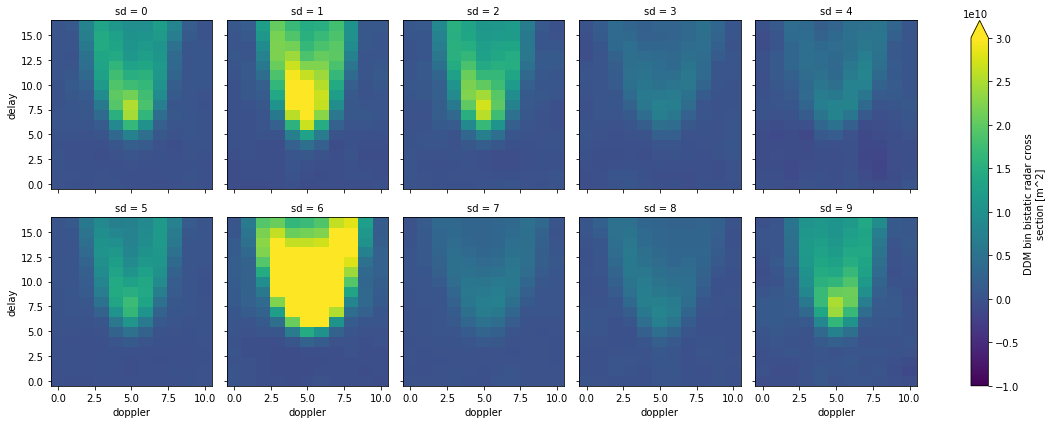

In [6]:
%matplotlib inline
# plotting random samples of bistatic radar cross section with quality==1
ds_q1.brcs.sel(sd=np.random.choice(ds_q1.sd, 10)).plot(col='sd',col_wrap=5,
                                                       vmin=-1e10,vmax=3e10,cmap='viridis')

##### Notes: 
- bad data still seems to be present 
- how is quality determined?
- difficult to determine colorbar range -> standardize
- 

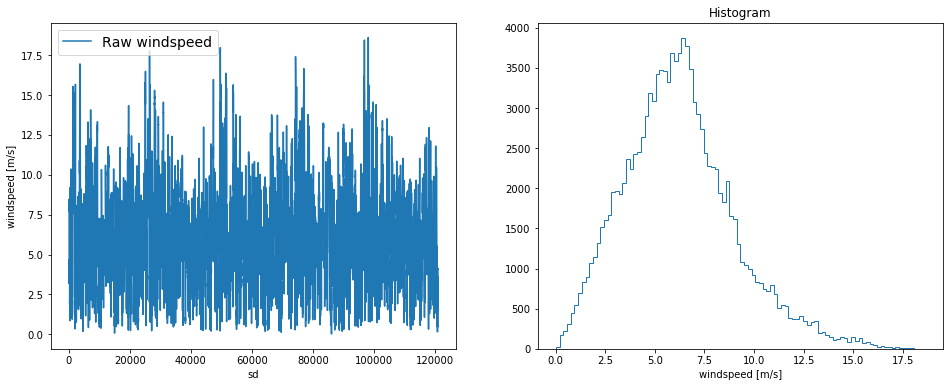

In [7]:
%matplotlib inline
# plotting data-series of windspeed and distribution
nrows, ncols =  1,2
fig, axs = plt.subplots(nrows=nrows,ncols=ncols,figsize = (ncols*8.,nrows*6))
ds_q1.windspeed.plot(ax=axs[0],label='Raw windspeed')
#ds_q1.windspeed.rolling(sd=1000, center=True).mean().plot(ax=axs[0],label='Smoothed windspeed')
ds_q1.windspeed.plot.hist(ax=axs[1],bins=100,histtype='step');
axs[0].legend()


Notes:
- no units for windspeed
- assuming m/s, generally weak (gale is <10.8 m/s)


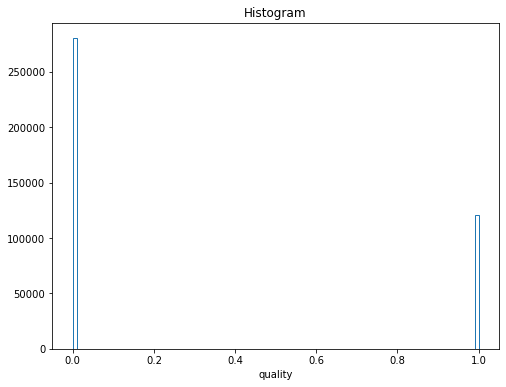

In [8]:
%matplotlib inline
# check quality values
nrows, ncols =  1,1
fig, axs = plt.subplots(nrows=nrows,ncols=ncols,figsize = (ncols*8.,nrows*6))
ds.quality.plot.hist(ax=axs,bins=100,histtype='step');


Notes:
- a lot of bad data (quality = 0)

#### Task 2: Use a ML framework of your choice to implement an artificial neural network for analysing the image data from Task 1.

- windspeed is apparently calculated from brcs data (e.g. https://ieeexplore.ieee.org/document/8410379)
- assuming quality assessment is a manual task, given the 0/1 values
- quality assessment could therefore be improved/automated through machine learning

##### Therefore, for this task, determine whether the quality assessment can be automated through deep learning image classification. i.e. teach model to determine whether a bcrs image has a quality level of 0 or 1.
- original setup source: https://examples.pyviz.org/landsat_clustering/landuse_clustering.html


In [9]:
# Split files into train and test sets; take 10% of training set for validation
# for better model assessment, creating training set with same number of 1 and 0 quality
train_set_0 = np.random.choice(ds.sd.where(ds.quality==0, drop=True), int(7e4), False)
train_set_1 = np.random.choice(ds.sd.where(ds.quality==1, drop=True), int(7e4), False)
train_set = (np.concatenate((train_set_0,train_set_1)))
validation_set = np.random.choice(train_set, int(train_set.size*0.1), False)
# the downside is that the test set does not have a lot of quality=1
test_set = np.setdiff1d(ds.sd, train_set)

# Define function to sample from train or test set
qualities = np.unique(ds.quality)
# set up mapping to an identity matrix to use for one-hot encoding
one_hot_mapping = dict(zip(qualities, np.eye(qualities.size)))

# standardize brcs data
ds_standard = ds
ds_standard['brcs']=((ds['brcs']-ds['brcs'].mean(('delay','doppler')))/ds['brcs'].std(('delay','doppler')))
ds_standard

<xarray.Dataset>
Dimensions:            (channel: 1, delay: 17, doppler: 11, sd: 401218)
Dimensions without coordinates: channel, delay, doppler, sd
Data variables:
    spacecraft_id      (sd) int16 ...
    spacecraft_num     (sd) int8 ...
    delay_resolution   (sd) float32 ...
    zenith_code_phase  (sd) float32 ...
    brcs               (sd, delay, doppler, channel) float32 -0.7600638 ... -0.6206483
    windspeed          (sd) float64 ...
    quality            (sd) int32 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 0 0 0 0 0 0 0

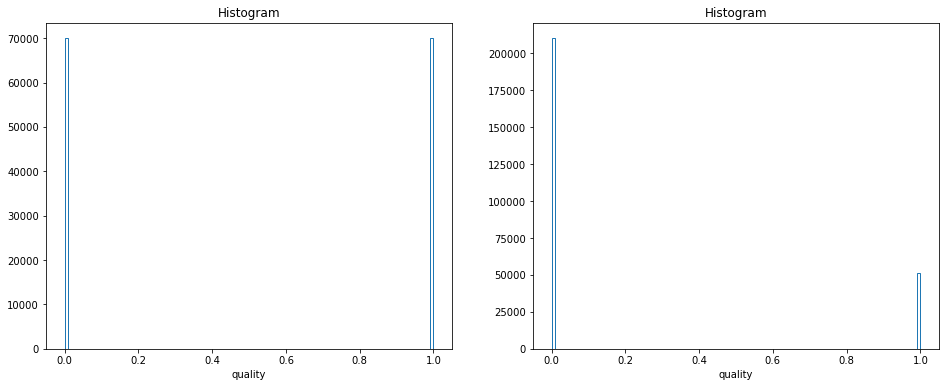

In [10]:
%matplotlib inline
# check how many examples of 0/1 are in the train and test set
nrows, ncols =  1,2
fig, axs = plt.subplots(nrows=nrows,ncols=ncols,figsize = (ncols*8.,nrows*6))
# sorting indices may make it faster
ds_standard.sel(sd=np.sort(train_set).astype(int)).quality.plot.hist(ax=axs[0],bins=100,histtype='step');
ds_standard.sel(sd=np.sort(test_set).astype(int)).quality.plot.hist(ax=axs[1],bins=100,histtype='step');

:Layout
   .Polygons.Q_colon_1.I    :Polygons   [doppler,delay]   (brcs)
   .Polygons.Q_colon_0.I    :Polygons   [doppler,delay]   (brcs)
   .Polygons.Q_colon_1.II   :Polygons   [doppler,delay]   (brcs)
   .Polygons.Q_colon_1.III  :Polygons   [doppler,delay]   (brcs)
   .Polygons.Q_colon_0.II   :Polygons   [doppler,delay]   (brcs)
   .Polygons.Q_colon_0.III  :Polygons   [doppler,delay]   (brcs)
   .Polygons.Q_colon_0.IV   :Polygons   [doppler,delay]   (brcs)
   .Polygons.Q_colon_1.IV   :Polygons   [doppler,delay]   (brcs)
   .Polygons.Q_colon_0.V    :Polygons   [doppler,delay]   (brcs)
   .Polygons.Q_colon_0.VI   :Polygons   [doppler,delay]   (brcs)
   .Polygons.Q_colon_0.VII  :Polygons   [doppler,delay]   (brcs)
   .Polygons.Q_colon_0.VIII :Polygons   [doppler,delay]   (brcs)
   .Polygons.Q_colon_0.IX   :Polygons   [doppler,delay]   (brcs)
   .Polygons.Q_colon_0.X    :Polygons   [doppler,delay]   (brcs)
   .Polygons.Q_colon_1.V    :Polygons   [doppler,delay]   (brcs)
   .Polygons.Q_colon_1.VI   :Polygons   [doppler,delay]   (brcs)
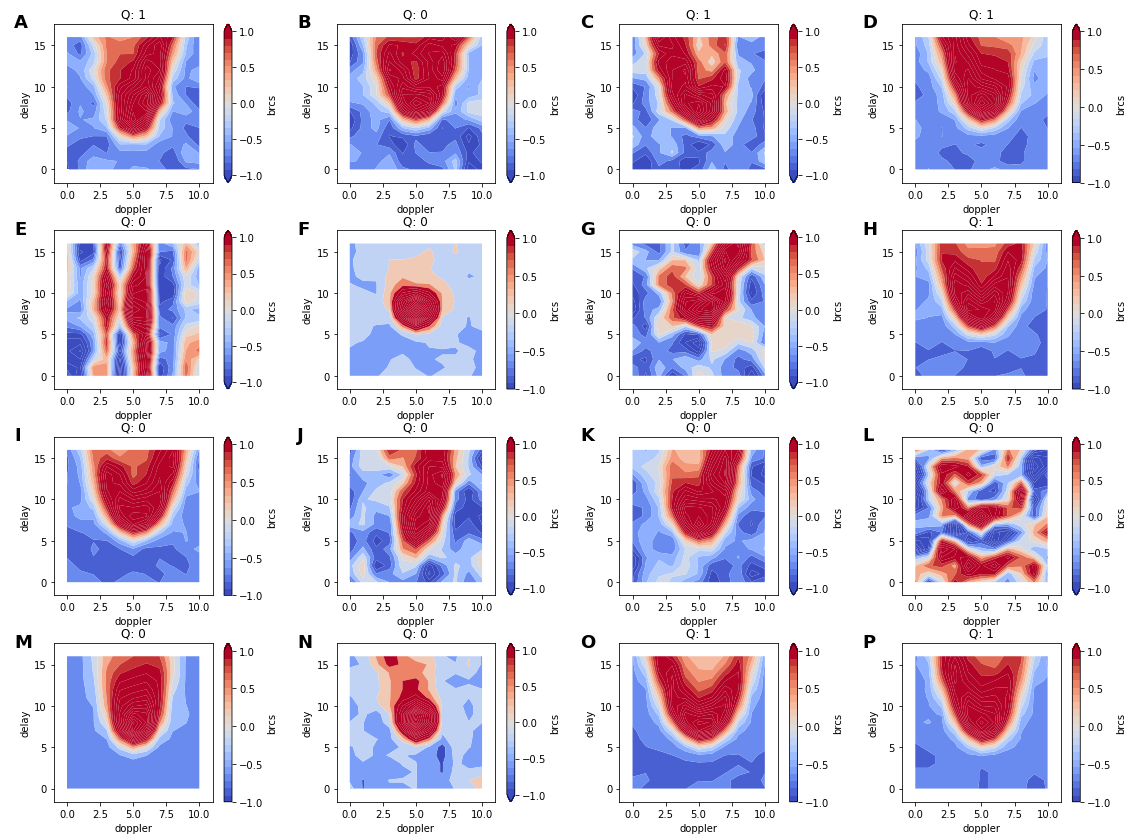

In [11]:
# plotting sample of standardized brcs data
# setup varies depending if bokeh are matplotlib are setup for holoviews
if hv.Store.current_backend == 'bokeh':
    options = dict(fontsize={'title': '8pt'}, width=250, height=250)
    hv_sample = hv.Layout([plot_data((get_sample(ds_standard,qtype))).options(**options) 
                           for qtype in np.random.choice(qualities, 16)]).cols(4)
else:
    hv_sample = hv.Layout([plot_data((get_sample(ds_standard,qtype))).options(linewidth=0) 
                           for qtype in np.random.choice(qualities, 16)]).cols(4)
hv_sample

In [12]:
size = (17, 11)
# Classification with 2 hidden layers
# convert image to 1D feature vectors
# Conv2D: creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.
# Downsamples the input representation by taking the maximum value over the window defined by pool_size for each 
# dimension along the features axis. 
# Activation function: mathematical operation that transforms the result or signals of neurons into a normalized output.
# relu: rectified linear unit, y=max(0, x)
# sigmoid: "The sigmoid function is defined as 1 divided by (1 + exp(-x)). It's curve is like an "S" and is like 
# a smoothed version of the Heaviside (Unit Step Function) function.""
model = keras.models.Sequential([
    # 6 = number of output filters -> increasing did not help
    keras.layers.Conv2D(6, (3,3), input_shape=(*size,1)),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(6, (3,3)),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    
    # 2 dense layer - 6 units is dimensionality of output space -> increasing didn't help
    keras.layers.Dense(6, activation=keras.activations.relu),
    keras.layers.Dense(2, activation=keras.activations.sigmoid)
])
model_rms = keras.models.clone_model(model)
model_rms.compile(loss="categorical_crossentropy", optimizer='rmsprop', metrics=["accuracy","categorical_crossentropy"]) # binary_crossentropy
model_rms.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 15, 9, 6)          60        
_________________________________________________________________
activation (Activation)      (None, 15, 9, 6)          0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 4, 6)           0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 5, 2, 6)           330       
_________________________________________________________________
activation_1 (Activation)    (None, 5, 2, 6)           0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 1, 6)           0         
_________________________________________________________________
flat

Notes:
- trying more layers and increasing units did not make a big difference, therefore sticking with simplest model
- using binomial crossentropy resulted in lower accuracy - needs more investigation


In [14]:
# Plot smoothed output of model - accuracy, loss, categorical cross-entropy from both the training and validation
monitor = MonitorCallback(metrics=['acc', 'loss','val_categorical_crossentropy','categorical_crossentropy'])
# streaming plot if using bokeh (see below for matplotlib)
if hv.Store.current_backend == 'bokeh':
    hvout = monitor.layout.options('Curve', width=275).map(rolling, hv.Curve)
hvout
# Overfit/Underfit (https://www.tensorflow.org/tutorials/keras/overfit_and_underfit)
# If both metrics are moving in the same direction, everything is fine.
# If the validation metric begins to stagnate while the training metric continues to improve, you are probably close to overfitting.
# If the validation metric is going in the wrong direction, the model is clearly overfitting.


In [15]:
# run model and evaluate test and training set
print('Fit:')
model_rms.fit_generator(gen_samples(ds_standard,'training'), steps_per_epoch=12, epochs=150, 
                    validation_data=gen_samples(ds_standard,'validation'), validation_steps=12,
                        use_multiprocessing=False,
                    verbose=0, callbacks=[monitor])
results = model_rms.evaluate(gen_samples(ds_standard,'test'), steps=128)

print('Test:')
results = model_rms.evaluate(gen_samples(ds_standard,'test'), steps=128)

print('Train')
results = model_rms.evaluate(gen_samples(ds_standard,'train'), steps=128)


Fit:
Instructions for updating:
Use tf.cast instead.
128/128 [==============================] - 0s 3ms/step - loss: 0.4519 - acc: 0.6406 - categorical_crossentropy: 0.4519
Test:
128/128 [==============================] - 0s 3ms/step - loss: 0.4317 - acc: 0.6484 - categorical_crossentropy: 0.4317
Train
128/128 [==============================] - 0s 4ms/step - loss: 0.4246 - acc: 0.6797 - categorical_crossentropy: 0.4246


:Layout
   .DynamicMap.I   :DynamicMap   []
      :Curve   [Epoch]   (acc)
   .DynamicMap.II  :DynamicMap   []
      :Curve   [Epoch]   (loss)
   .DynamicMap.III :DynamicMap   []
      :Curve   [Epoch]   (val_categorical_crossentropy)
   .DynamicMap.IV  :DynamicMap   []
      :Curve   [Epoch]   (categorical_crossentropy)
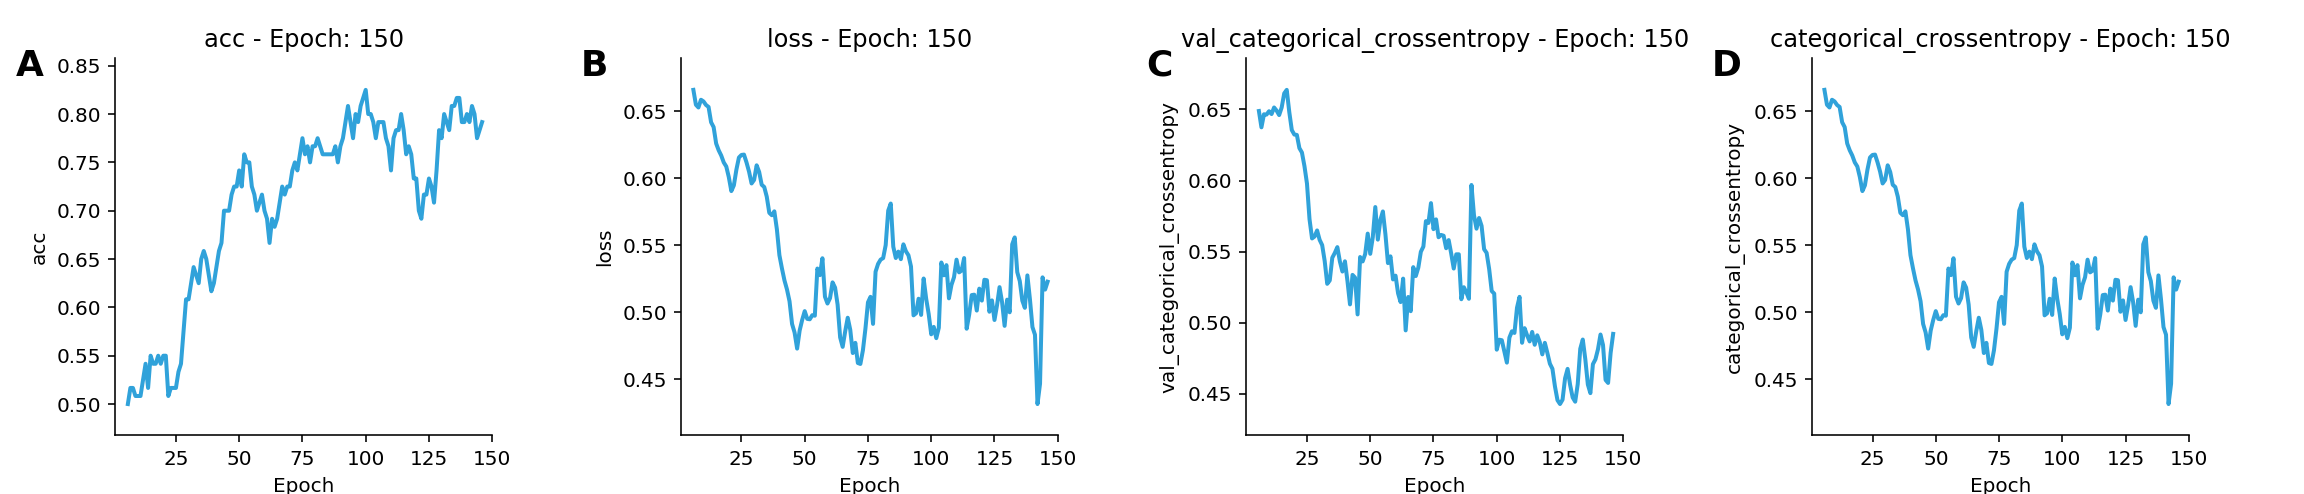

In [16]:
if hv.Store.current_backend == 'matplotlib':
    hvout = monitor.layout.options('Curve',aspect=1).map(rolling, hv.Curve)
hvout

#### Visual inspection of models ability to predict

:Layout
   .Polygons.Predicted_colon_0_hyphen_minus_Actual_colon_0.I    :Polygons   [doppler,delay]   (brcs)
   .Polygons.Predicted_colon_1_hyphen_minus_Actual_colon_0.I    :Polygons   [doppler,delay]   (brcs)
   .Polygons.Predicted_colon_0_hyphen_minus_Actual_colon_0.II   :Polygons   [doppler,delay]   (brcs)
   .Polygons.Predicted_colon_1_hyphen_minus_Actual_colon_1.I    :Polygons   [doppler,delay]   (brcs)
   .Polygons.Predicted_colon_0_hyphen_minus_Actual_colon_0.III  :Polygons   [doppler,delay]   (brcs)
   .Polygons.Predicted_colon_1_hyphen_minus_Actual_colon_0.II   :Polygons   [doppler,delay]   (brcs)
   .Polygons.Predicted_colon_0_hyphen_minus_Actual_colon_0.IV   :Polygons   [doppler,delay]   (brcs)
   .Polygons.Predicted_colon_0_hyphen_minus_Actual_colon_0.V    :Polygons   [doppler,delay]   (brcs)
   .Polygons.Predicted_colon_0_hyphen_minus_Actual_colon_0.VI   :Polygons   [doppler,delay]   (brcs)
   .Polygons.Predicted_colon_1_hyphen_minus_Actual_colon_1.II   :Polygons   [doppler,delay]   (brcs)
   .Polygons.Predicted_colon_1_hyphen_minus_Actual_colon_0.III  :Polygons   [doppler,delay]   (brcs)
   .Polygons.Predicted_colon_1_hyphen_minus_Actual_colon_0.IV   :Polygons   [doppler,delay]   (brcs)
   .Polygons.Predicted_colon_1_hyphen_minus_Actual_colon_0.V    :Polygons   [doppler,delay]   (brcs)
   .Polygons.Predicted_colon_1_hyphen_minus_Actual_colon_1.III  :Polygons   [doppler,delay]   (brcs)
   .Polygons.Predicted_colon_0_hyphen_minus_Actual_colon_0.VII  :Polygons   [doppler,delay]   (brcs)
   .Polygons.Predicted_colon_0_hyphen_minus_Actual_colon_0.VIII :Polygons   [doppler,delay]   (brcs)
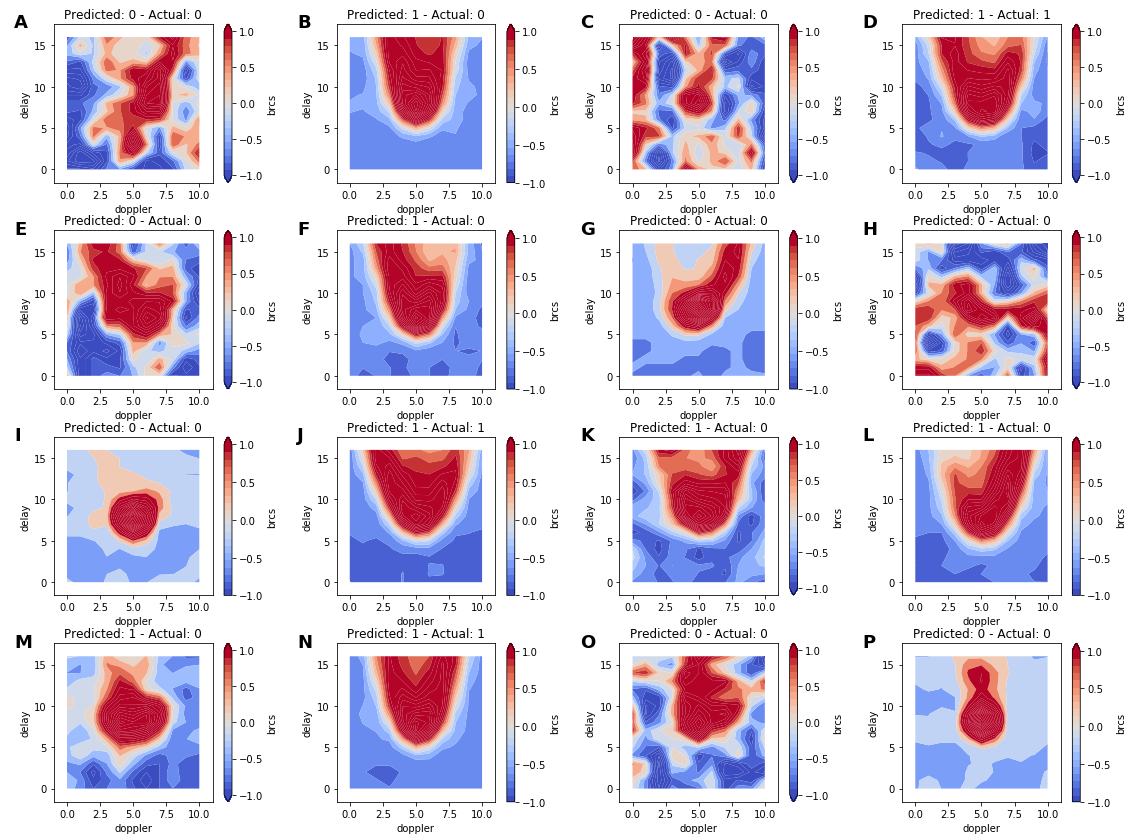

In [19]:
options = dict(fontsize={'title': '8pt'}, width=250, height=250)
if hv.Store.current_backend == 'bokeh':
    hvout = hv.Layout([get_prediction(model_rms,(get_sample(ds_standard,qtype))).options(**options) 
                       for qtype in np.random.choice(qualities, 16)]).cols(4)
else:
    hvout = hv.Layout([get_prediction(model_rms,(get_sample(ds_standard,qtype))).options(linewidth=0) 
                       for qtype in np.random.choice(qualities, 16)]).cols(4)
hvout

#### Summary
Model accuracy and loss reached reasonable levels and model predicted correctly about 60-70% of the time and did not seem to be over- or under-fitting. Looking at the visual assessment above, it learned the typical shape of a quality=1 well, but there were many instances of quality=0 with the same shape that the model predicted incorrectly. More info about why these results have quality=0 is needed.

##### Still to do
1. Is there a way to use xarray dask chunking with TensorFlow/Keras for parrelization?
    - when xarray is imported into dask chunks, Keras is very slow
    - would help to speed up analysis and make it more scaleable
2. Need to look into uncertainty and explainability of the results. 
3. Clean up plots